In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [3]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv");

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

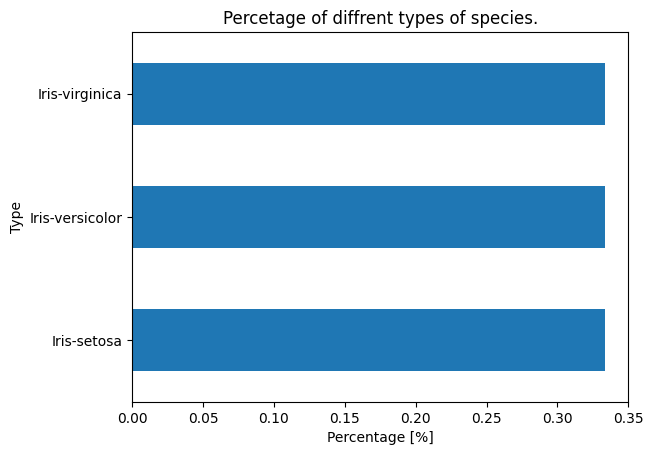

In [15]:
import matplotlib.pyplot as plt
df['species'].value_counts(normalize=True).plot(kind='barh')
plt.title('Percetage of diffrent types of species.')
plt.xlabel('Percentage [%]')
plt.ylabel('Type');

#by this, we find will that it is balanced data

In [16]:
y = df.species
X = df.drop(['species'],axis=1)

In [25]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
y = y.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [17]:
#So first normalize the data
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)

In [33]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
from sklearn.model_selection import cross_val_score
scores = -1 * cross_val_score(model, X_train,y_train,cv=cv,scoring='neg_mean_absolute_error')
scores

array([0.125     , 0.        , 0.04166667, 0.04166667, 0.        ])

In [35]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
preds = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
mse

0.0